# Intro
In this notebook I am going to explore the data a little bit.
The competition goal is to give probability estimation to if an image contains a cat or a dog.
The content score is measured by by LogLoss, where
* y=1 -> dog
* y=0 -> cat

We will try to minimize the score
      

# Preprocess the data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, cv2

 Creating lists of image file names for both cats and dogs

In [6]:
TRAIN_DIR = '../input/train/' 
TEST_DIR = ''

image_list = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 
dog_image_list = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
cat_image_list = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]


In [7]:
print('Total images:\t',len(image_list),
      '\nDog Images:\t',len(dog_image_list),
      '\nCat Images:\t',len(cat_image_list))

Total images:	 25000 
Dog Images:	 12500 
Cat Images:	 12500


We can see that there is equal number of images to cats and dogs

Now we are going to load the images and resize them to 64x64x3

In [38]:
ROWS = 64
COLS = 64
CHANNELS = 3

def load_image(file_path, size=(ROWS,COLS)):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])
    return cv2.resize(rgb_img, (ROWS,COLS))
    

def load_image_list(file_list):
    count = len(file_list)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)
    labels = []
    
    for i, image_name in enumerate(file_list):
        data[i] = load_image(image_name)
        
        if 'dog' in image_name:
            labels.append(1)
        else:
            labels.append(0)
        
        if i%250 == 0:
            print("Loaded",str(i),"Out of",str(count))
    return data, labels

In [44]:
training_file_list = dog_image_list[:1000] + cat_image_list[:1000]

train_data, training_labels = load_image_list(training_file_list)

print ("Training data shape: {}".format(train_data.shape))
print ("Labels length: {}".format(len(training_labels)))

Loaded 0 Out of 2000
Loaded 250 Out of 2000
Loaded 500 Out of 2000
Loaded 750 Out of 2000
Loaded 1000 Out of 2000
Loaded 1250 Out of 2000
Loaded 1500 Out of 2000
Loaded 1750 Out of 2000
Training data shape: (2000, 64, 64, 3)
Labels length: 2000


## Lets show some images
sum dogs images

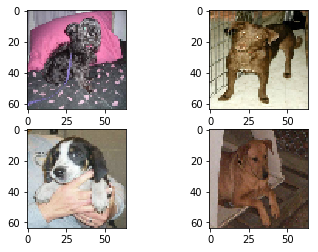

In [40]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(train_data[0])
axarr[0,1].imshow(train_data[1])
axarr[1,0].imshow(train_data[2])
axarr[1,1].imshow(train_data[3])

Some cats Images

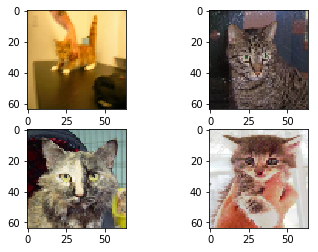

In [41]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(train_data[1000])
axarr[0,1].imshow(train_data[1001])
axarr[1,0].imshow(train_data[1002])
axarr[1,1].imshow(train_data[1003])
plt.show()

We can see that some images are not face closeup of the animal, but a whole body shots.

We also go some strange images like dog.10801 (Finger in a metal loop???)


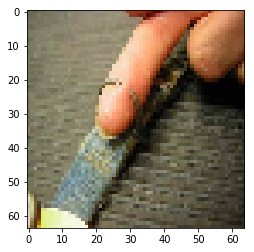

In [43]:
strange_dog = load_image(TRAIN_DIR+'dog.10801.jpg', size=(350,261))
plt.imshow(strange_dog)